# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [253]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Файл открывается. Можно преступить к предобработке данных.

### Шаг 2. Предобработка данных

Последовательно изучим все колонки таблицы на предмет пропущенных значений, артефактов и т.п.

In [255]:
import numpy as np
import matplotlib.pyplot as plt

#### Колонка <code>locality_name</code>

In [256]:
# Заменим пустые значения на значение 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')
unique_locality_names_before = len(data['locality_name'].unique())
print(np.sort(data['locality_name'].unique()))

['unknown' 'Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг'
 'Высоцк' 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп'
 'Кириши' 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт'
 'Кудрово' 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино'
 'Никольское' 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво'
 'Подпорожье' 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург'
 'Светогорск' 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой'
 'Тихвин' 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуниц

In [257]:
# Необходимо заменить в названиях букву 'ё' на 'е' -
# мы избавимся от дублей типа 'посёлок Бугры' и 'поселок Бугры'
data['locality_name'] = data['locality_name'].replace({'ё': 'е'}, regex=True)

# Но также здесь есть дубли типа 'Мурино' и 'поселок Мурино' 
# (или более экзотичное 'поселок при железнодорожной станции Вещево' и 'поселок станции Вещево')
# Решил удалить из названий все приставки типа 'поселок', 'деревня' и т.п.
def delete_locality_type(data, locality_type):
    data['locality_name'] = data['locality_name'].replace({locality_type + ' ': ''}, regex=True)
    
delete_locality_type(data, 'городской поселок')
delete_locality_type(data, 'коттеджный поселок')
delete_locality_type(data, 'поселок городского типа')
delete_locality_type(data, 'поселок при железнодорожной станции')
delete_locality_type(data, 'поселок станции')
delete_locality_type(data, 'садоводческое некоммерческое товарищество')
delete_locality_type(data, 'садоводческое товарищество')
delete_locality_type(data, 'садовое товарищество')
delete_locality_type(data, 'поселок')
delete_locality_type(data, 'село')
delete_locality_type(data, 'деревня')

print(np.sort(data['locality_name'].unique()))

['unknown' 'Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро'
 'Барышево' 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпоселок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кинги

Для дальнейшей работы реализуем некоторые процедуры.

In [258]:
# Заполняет пустые значения в колонке (0 или NaN), а также заведомо неверные (меньше 0) по среднему значению
# Параметры:
#     data - таблица данных
#     column - заполняемая колонка таблицы
#     index_column - колонка таблицы по средним значения, которой заполняется column
#     aggfunc - mean или median
# Для примера: если мы захотим заполнить пропуски в колонке airports_nearest 
# по среднему значению для данного населенного пункта (т.е. по колонке locality_name), то:
#     column = 'airports_nearest'
#     index_column = 'locality_name'
def fillna_with_locality_mean(data, column, index_column, aggfunc):
    selection = column + '.isnull() or ' + column + ' <= 0'
    nan_number_before = data.query(selection).shape[0]
    
    data_mean = data.pivot_table(index=index_column, values=column, aggfunc=aggfunc)
    data_mean.columns = [column + '_mean']

    # Соединяем таблицу данных и таблицу средних расстояний 
    data = data.join(data_mean, on=index_column, how='left')

    # Подменяем незаполненные значения в колонке column в data из колонки column_mean
    data.loc[data[column].isnull(), column] = data[column + '_mean']
    data.loc[data[column] <= 0, column] = data[column + '_mean']

    # Удаляем ненужную колонку column_mean
    data = data.drop(column + '_mean', axis=1)
    
    nan_number_after = data.query(selection).shape[0]
    print('Пустых значений в колонке ' + column + ' до обработки:', nan_number_before, ', после:', nan_number_after)

In [259]:
# Приводит заполненные значения в колонке к типу int
# Процедуру будет удобно использовать, например, для растояний
def filled_values_to_int(data, column):
    data.loc[data[column].notnull(), column] = (
        data.loc[data[column].notnull(), column].astype('int')
    )

#### Колонки <code>airports_nearest</code>, <code>cityCenters_nearest</code>, <code>parks_nearest</code>, <code>pond_nearest</code>

Во всех этих колонках есть пустые значения. Незаполненные значения заполним средним значением по данному населенному пункту (колонку <code>locality_name</code> обработали ранее). Кроме этого для удобства работы значения во всех этих колонках можно привести к типу int.

In [260]:
fillna_with_locality_mean(data, 'airports_nearest', 'locality_name', 'mean')
filled_values_to_int(data, 'airports_nearest')

fillna_with_locality_mean(data, 'cityCenters_nearest', 'locality_name', 'mean')
filled_values_to_int(data, 'cityCenters_nearest')

fillna_with_locality_mean(data, 'parks_nearest', 'locality_name', 'mean')
filled_values_to_int(data, 'parks_nearest')

fillna_with_locality_mean(data, 'ponds_nearest', 'locality_name', 'mean')
filled_values_to_int(data, 'ponds_nearest')

Пустых значений в колонке airports_nearest до обработки: 5543 , после: 4829
Пустых значений в колонке cityCenters_nearest до обработки: 5519 , после: 4829
Пустых значений в колонке parks_nearest до обработки: 15620 , после: 5998
Пустых значений в колонке ponds_nearest до обработки: 14589 , после: 4938


Проверим аномалии в значениях

In [261]:
print(data['airports_nearest'].describe())
print(data['cityCenters_nearest'].describe())
print(data['parks_nearest'].describe())
print(data['ponds_nearest'].describe())

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


Проблем в данных не вижу. 1 метр до парка - почему бы и нет?

#### Колонка <code>parks_around3000</code>, <code>ponds_around3000</code>

Интересно, что количество заполненных значений в этих колонках совпадает. Проверим, есть ли строки, в которых одно значение заполнено, а другое - нет.

In [262]:
print(data.query('parks_around3000.isnull() and ponds_around3000.notnull()').shape[0])
print(data.query('parks_around3000.notnull() and ponds_around3000.isnull()').shape[0])

0
0


Я предполагаю, что эти значения появились в выгрузке позже (возможно, эту опцию добавили в объявления с какого-то момента). Поэтому просто обнулить количество парков и прудов для незаполненны значений неверно. Оставляем как есть.

#### Колонка <code>balcony</code>

In [263]:
np.sort(data['balcony'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

In [264]:
# Если человек не указал число балконов — скорее всего, их нет
# Заполним пустые значения 0
# Приведем значения к типу int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].value_counts().sort_index())

0    15277
1     4195
2     3659
3       81
4      183
5      304
Name: balcony, dtype: int64


#### Колонка <code>ceiling_height</code>

In [265]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Многое бросается в глаза:
* есть пропущенные значения - их оставляем, подобрать разумное среднее значение невозможно
* минимальное значение - 1 м
* максимальное значение - 100 м

In [266]:
# Изучаем слишком НИЗКИЕ потолки
data.query('ceiling_height < 2.52').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
2.25       1
2.30       4
2.34       1
2.40      23
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3515
2.51      34
Name: ceiling_height, dtype: int64

Я верю, что потолок может быть 2 метра (тем более, там не 1, а 11 объявлений): полуподвальное помещение + натяжной потолок, но ниже - это уже подозрительно. Возможно, автор объявления ошибся и, например, вместо 2,75 указал 1,75?

In [267]:
# Принял решение очистить значения высоты потолков меньше 2 метров - как будто автор объявления ее не указал
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = np.nan

In [268]:
# Изучаем слишком ВЫСОКИЕ потолки
# Почитал по теме: высота в питерских дореволюционных зданиях может быть и больше 5 метров
data.query('ceiling_height > 5').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
5.2      1
5.3      2
5.5      1
5.6      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

In [269]:
# Допускаю, что может быть высота и более 10 метров, например, в лофтах.
# Но вот больше 20 метров? Опять есть вероятность, что автор объявления вместо 25.0 метров - хотел написать 2.5
# Принял решение: все потолки от 20 метров - очистить
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = np.nan

In [270]:
# Посмотрим что получилось
data.query('ceiling_height.notnull()')['ceiling_height'].describe()

count    14478.000000
mean         2.729574
std          0.313504
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

В результате количество заполненных значений в колонке <code>ceiling_height</code> уменьшилось, но мы избавились от заведомо подозрительных значений.

#### Колонка <code>studio</code>

In [271]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Проблем в данных не вижу. Ожидаемо студий гораздо меньше, чем обычных квартир.

#### Колонки <code>kitchen_area</code>, <code>living_area</code>, <code>total_area<code>

In [272]:
#Колонка total_area
print(data['total_area'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


В колонке <code>total_area</code> все в порядке.

Напрашивается проверка - сравнить сумму площади кухни и жилой площади с общей площадью. Очевидно, общая площадь должна быть больше, т.к. в нее еще входит санузел.

In [273]:
print(data.query('kitchen_area.isnull() and living_area.notnull() and living_area > total_area').shape[0])
print(data.query('kitchen_area.notnull() and living_area.isnull() and kitchen_area > total_area').shape[0])
print(data.query('kitchen_area.notnull() and living_area.notnull() and kitchen_area + living_area > total_area').shape[0])

0
0
64


Аномальных площадей немного, но они есть. Посмотрим на них внимательнее.

In [274]:
data['total_area_difference'] = data['total_area'] - data['kitchen_area'] - data['living_area']
data.query('total_area_difference < 0').loc[:, ['total_area', 'living_area', 'kitchen_area', 'studio', 'total_area_difference']].sort_values(by='total_area_difference')

,total_area,living_area,kitchen_area,studio,total_area_difference
7239,90.00,76.4,43.4,False,-2.980000e+01
4366,47.70,39.8,28.2,False,-2.030000e+01
6802,69.00,64.0,25.0,False,-2.000000e+01
11579,33.00,26.0,26.0,False,-1.900000e+01
12530,39.03,36.9,18.6,False,-1.647000e+01
...,...,...,...,...,...
11150,42.30,37.7,5.4,False,-8.000000e-01
16325,79.70,60.0,20.0,False,-3.000000e-01
9385,69.00,61.0,8.3,False,-3.000000e-01
7680,38.80,33.0,6.0,False,-2.000000e-01


В первой строке: общая площадь = 90, жилая = 76,4, кухня = 43,4. Может это опечатка в жилой площади, может оперчатка в площади кухни, может кухня плавно перетекает в комнату? Строк с таким несоответствием всего 64 - исправлять не будем, оставим на совести авторов объявлений.

Заполним пустые значения в колонках <code>kitchen_area</code> и <code>living_area</code> основываясь на следующей гипотезе:
* Чем больше площадь квартиры (<code>total_area</code> - значение в колонке заполнено во всех строках) - тем больше площадь кухни и жилая площадь

0.9395373338721491


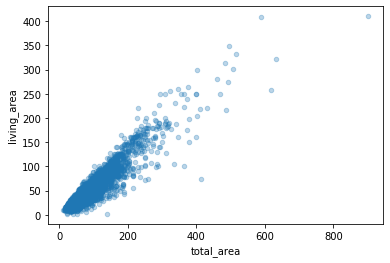

In [275]:
print(data['total_area'].corr(data['living_area']))
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3)

С жилой площадью - зависимость бросается в глаза (чем больше квартира, тем больше жилая площадь).

0.6091211711198314


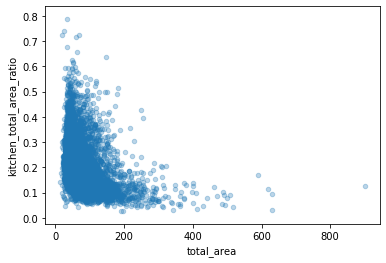

In [276]:
print(data['total_area'].corr(data['kitchen_area']))
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']
data.plot(x='total_area', y='kitchen_total_area_ratio', kind='scatter', alpha=0.3)

А с площадью кухни не все так "линейно". Вероятно, площадь кухни увеличивается до каких-то пределов, но с делать ее больше какого-то максимума нет смысла. Видим, что с ростом общей площади, total_kitchen_area_ratio стремится куда-то в район 0,05-0,15 (т.е. занимают примерно 10% от площади). 

Для заполнения пустых площадей проведем категоризацию по общей площади.

In [277]:
# На сколько групп мы хотим разделить данные
number_of_groups = 20
intervals_dict = {}

for i in range(0, number_of_groups):
    quantile1 = np.quantile(data['total_area'], i * (1 / number_of_groups))
    quantile2 = np.quantile(data['total_area'], (i + 1) * (1 / number_of_groups))
    intervals_dict[i] = [quantile1, quantile2]
    
print(intervals_dict)
print()
print('Элементов в интревале:', data.query('total_area >= @intervals_dict[0][0] and total_area <= @intervals_dict[0][1]').shape[0])

{0: [12.0, 31.0], 1: [31.0, 33.0], 2: [33.0, 35.2], 3: [35.2, 37.6], 4: [37.6, 40.0], 5: [40.0, 42.0], 6: [42.0, 44.0], 7: [44.0, 46.0], 8: [46.0, 49.0], 9: [49.0, 52.0], 10: [52.0, 55.0], 11: [55.0, 58.0], 12: [58.0, 61.0], 13: [61.0, 64.8], 14: [64.8, 69.9], 15: [69.9, 75.0], 16: [75.0, 82.0], 17: [82.0, 93.52000000000007], 18: [93.52000000000007, 116.0], 19: [116.0, 900.0]}

Элементов в интревале: 1485


In [278]:
def get_total_area_interval(total_area):
    for i in range(0, len(intervals_dict)):
        if (intervals_dict[i][0] <= total_area <= intervals_dict[i][1]):
            return i
    return -1

# Добавляем новую колонку, в которой будет хранится номер категории
data['total_area_interval'] = data['total_area'].apply(get_total_area_interval)

# Проверяем, что все заполнилось корректно
print(data.query('total_area_interval == -1 or total_area_interval.isnull()').shape[0])

# Получим сводную таблицу со средними значениями площадей для каждой категории
data_total_area_intervals = data.query('kitchen_area.notnull() and living_area.notnull()').pivot_table(index=['total_area_interval'], values=['total_area', 'kitchen_area', 'living_area'])
data_total_area_intervals.columns = ['kitchen_area_mean', 'living_area_mean', 'total_area_mean']

# и соединим ее с основной
data = data.merge(data_total_area_intervals, on='total_area_interval', how='left')
print(data.columns)

0
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'total_area_difference',
       'kitchen_total_area_ratio', 'total_area_interval', 'kitchen_area_mean',
       'living_area_mean', 'total_area_mean'],
      dtype='object')


In [279]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data['kitchen_area_mean']
data.loc[data['living_area'].isnull(), 'living_area'] = data['living_area_mean']

# Удалим теперь ненужные колонки
data = data.drop(['total_area_difference', 'kitchen_total_area_ratio', 'total_area_interval', 'kitchen_area_mean', 'living_area_mean', 'total_area_mean'], axis=1)
print(data.columns)

# Проверим, что теперь пустых значений в колонках kitchen_area и living_area не осталось
print(data.query('kitchen_area.isnull()').shape[0])
print(data.query('living_area.isnull()').shape[0])

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
0
0


#### Колонки <code>last_price</code>, добавляем колонку <code>price_for_meter</code>

In [280]:
print(data['last_price'].unique().min())
print(data['last_price'].unique().max())

12190.0
763000000.0


Кто-то продает квартиру за 12190 рублей. Возможно, здесь цена указана в тысячах? 

Добавим колонку <code>price_for_meter</code> - цена за квадратный метр. Напомню, что <code>total_area</code> мы проверили ранее.

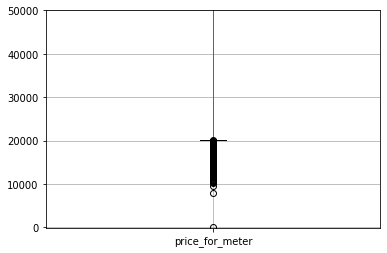

In [281]:
data['price_for_meter'] = data['last_price'] / data['total_area']
data['price_for_meter'] = data['price_for_meter'].astype('int')
plt.ylim(-100, 50000)
data.boxplot('price_for_meter')

Видим еднственный выброс около нуля.

In [282]:
data.query('price_for_meter < 10000').sort_values(by='price_for_meter')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.00000,25,NaN,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,111
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,31.11097,3,NaN,...,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,7962
4405,9,500000.0,52.0,2018-08-02T00:00:00,2,2.70,2.0,31.00000,1,NaN,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110.0,9615


Ну тут - к гадалке не ходи! В первой строки таблицы - ошибка. Явно цена указана в тысячах рублей, а не в рублях. К счастью, это единственное аномальное значение в таблице, и я принимаю решение удалить эту строку из таблицы.

In [283]:
data = data.query('price_for_meter > 1000')

# Также для дальнейшего удобства цену будем отображать в миллионах рублей
data['last_price'] = data['last_price'] / (10**6)
data['price_for_meter'] = data['price_for_meter'] / (10**6)

#### Колонка <code>days_exposition</code>

In [284]:
data['days_exposition'].describe()

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среди заполненных значений аномалий не вижу. Что делать с незаполненными значениями? Можно предположить, что количество дней размещений может зависеть от:
* цены квартиры (если лот в принципе слишком дорогой)
* цены м2 (если цена за м2 неоправдано высокая)

Проверим эти гипотезы через коэффициент корреляции:

In [285]:
# Добавим колонку цена за метр
print(data['days_exposition'].corr(data['last_price']))
print(data['days_exposition'].corr(data['price_for_meter']))

0.081125730509975
0.04804702734515139


Увы, если связь и есть, то она сложнее. Сейчас идем дальше, пустые значения в колонке оставляем.

#### Колонка <code>first_day_exposition</code>

In [286]:
print(data['first_day_exposition'].head())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


Данные необходимо привести к типу дата.

In [287]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


#### Колонка <code>floor</code>

In [288]:
print(np.sort(data['floor'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


В колонке <code>floor</code> все в порядке.

#### Колонка <code>floors_total</code>

In [289]:
print(np.sort(data['floors_total'].unique()))
print(data.query('floors_total.isnull()').shape[0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]
86


В колонке <code>floors_total</code> - 86 пустых значений. Заполнять их как-то (например, по колонке <code>floor</code>) - будет похоже на угадывание. Поэтому оставим эти значения пустыми.

#### Колонка <code>is_apartment</code>

In [290]:
print(np.sort(data['is_apartment'].unique()))
print(data.query('is_apartment.isnull()').shape[0])
print(data.query('is_apartment.notnull()')['is_apartment'].value_counts())

[nan False True]
20923
False    2725
True       50
Name: is_apartment, dtype: int64


В более чем 20000 строк поле <code>is_apartment</code> пустое - заполнять значения не будем. Среди заполненных значений - вижу ожидаемую пропорцию: аппартаментов значительно меньше, чем жилых помещений.

#### Колонка <code>open_plan</code>

In [291]:
print(np.sort(data['open_plan'].unique()))
print(data.query('open_plan.notnull()')['open_plan'].value_counts())

[False  True]
False    23631
True        67
Name: open_plan, dtype: int64


В колонке <code>open_plan</code> все в порядке.

#### Колонка <code>total_images</code>

In [292]:
print(np.sort(data['total_images'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]


В колонке <code>total_images</code> все в порядке.

#### Колонка <code>rooms</code>

In [293]:
print(np.sort(data['rooms'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]


Квартиры с 0 комнат. Возможно это студии?

197
138


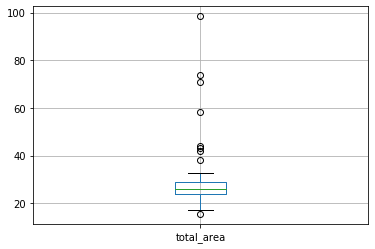

In [294]:
print(data.query('rooms == 0').shape[0])
print(data.query('rooms == 0 and studio').shape[0])
data.query('rooms == 0 and studio').boxplot('total_area')

Студии предполагают отсутствие межкомнатных перегородок, т.е. по факту там 1 комната. Студия 100 м2 - бывает и такое.

In [295]:
data.loc[(data['rooms'] == 0) & (data['studio']), 'rooms'] = 1

# Проверим, что все заполнилось
print(data.query('rooms == 0 and studio').shape[0])

0


Что делать с остальными строками где rooms = 0? Основная идея: предположить количество комнат исходя из общей площади квартиры.

59


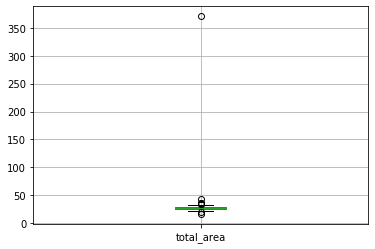

In [296]:
print(data.query('rooms == 0 and not studio').shape[0])
data.query('rooms == 0 and not studio').boxplot('total_area')

Видим вверху единичный выброс, но все проблемные значения расположены где-то от 0 до 50.

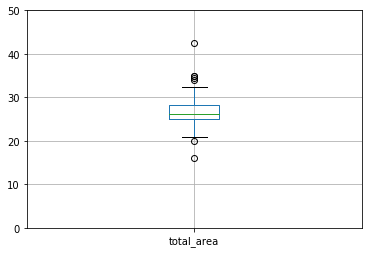

In [297]:
plt.ylim(0, 50)
data.query('rooms == 0 and not studio').boxplot('total_area')

In [298]:
print(data.query('rooms > 0 and total_area < 30')['rooms'].mean())
print(data.query('rooms > 0 and 30 < total_area < 40')['rooms'].mean())
print(data.query('rooms > 0 and 40 < total_area < 45')['rooms'].mean())
print(data.query('rooms > 0 and 350 < total_area < 400')['rooms'].mean())

1.0093023255813953
1.0221991701244812
1.5206361226808027
7.785714285714286


Что мы видим:
* для маленьких квартир (до 40 м2) можно с уверенностью сказать, что там 1 комната
* для квартир от 40 до 45 м2 - либо 1 либо 2 комнаты; будем считать, что 1 комната
* для квартир от 350 до 400 м2 - присутствует элемент случайности, конечно, там может быть и 5 и 10 комнат, но будем считать, что там 8 комнат
В итоге только для 2-х выбросов нам пришлось "угадывать" количество комнат, для остальных строк с пропущенными значениями в колонке <code>rooms</code> мы можем с уверенностью утверждать, что речь идет об однокомнатной квартире.

In [299]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 45), 'rooms'] = 1
data.loc[(data['rooms'] == 0) & (data['total_area'] > 350) & (data['total_area'] < 400), 'rooms'] = 8
print(data.query('rooms == 0').shape[0])

0


Среди многокомнатных присутствует и 19-ти комнатная квартира! Ну, я слышал про питерские коммуналки. Но все-таки интересно изучить детали.

In [300]:
data.query('rooms > 5').pivot_table(index='rooms', values='total_area', aggfunc=['count', 'mean', 'min', 'max']).sort_index()

,count,mean,min,max
,total_area,total_area,total_area,total_area
rooms,,,,
6,105,201.537619,87.0,500.0
7,59,265.325424,100.6,631.2
8,13,267.830769,150.0,373.1
9,8,305.975000,235.0,400.0
10,3,259.566667,216.1,290.0
11,2,188.900000,183.7,194.1
12,1,900.000000,900.0,900.0
14,2,304.200000,245.4,363.0


Не смотря на разброс (12-ти комнатная квартира - 900 м2, 19-ти комнатная квартира - 375 м2) - выглядит правдоподобно. Эксклюзивные варианты могут быть и с подобным метражом. В колонке <code>rooms</code> все в порядке.

### Шаг 3. Посчитайте и добавьте в таблицу

#### Добавить в таблицу цену квадратного метра

Колонку <code>price_for_meter</code> добавили ранее.

#### Добавить в таблицу день недели, месяц и год публикации объявления

In [301]:
# Для удобства дни недели будем считать с 1, а не с 0
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday + 1
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

data.head().loc[:, ['first_day_exposition', 'weekday', 'month', 'year']]

,first_day_exposition,weekday,month,year
0,2019-03-07,4,3,2019
1,2018-12-04,2,12,2018
2,2015-08-20,4,8,2015
3,2015-07-24,5,7,2015
4,2018-06-19,2,6,2018


#### Добавить этаж квартиры; варианты — первый, последний, другой

Ранее выяснили, что колонка <code>floor</code> заполнена полностью, а в колонке <code>floors_total</code> есть пустые значения.

In [302]:
def get_floor_type(row):
    if (row['floor'] == 1):
        return 'first'
    elif (pd.isnull(row['floors_total'])):
        return 'unknown'
    elif (row['floor'] == row['floors_total']):
        return 'last'
    else: 
        return 'other'
    
data['floor_type'] = data.apply(get_floor_type, axis=1)

print(data['floor_type'].value_counts())

other      17363
last        3335
first       2917
unknown       83
Name: floor_type, dtype: int64


#### Добавить соотношение жилой и общей площади, а также отношение площади кухни к общей

In [303]:
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']
data['living_total_area_ratio'] = data['living_area'] / data['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8705b90>]],
      dtype=object)

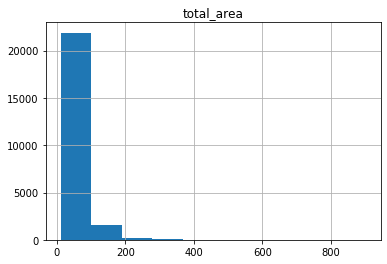

In [304]:
data.hist('total_area')

Очевидный вывод подтвердился: с ростом площади количество вариантов уменьшается. Интересно постмотреть отдельно, что происходит для вариантов от 0 до 100 м2.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8b10e10>]],
      dtype=object)

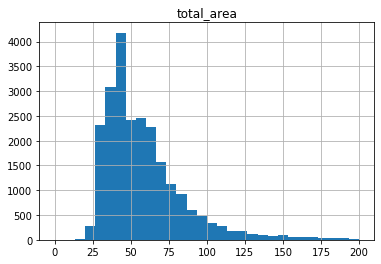

In [305]:
data.hist('total_area', range=(0, 200), bins=30)

Видим, что самый популярное предложение - где-то в районе 40 м2.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8f4cc50>]],
      dtype=object)

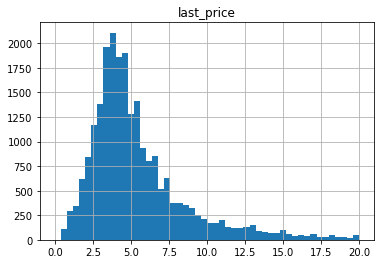

In [306]:
data.hist('last_price', range=(0, 20), bins=50)

Максимум предложений где-то в районе 4 млн рублей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf9209a10>]],
      dtype=object)

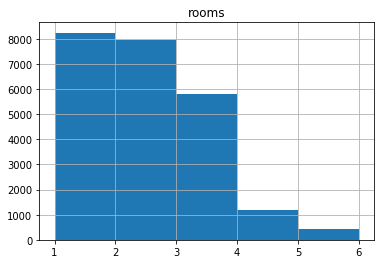

In [307]:
data.hist('rooms', range=(1, 6), bins=5)

Интересный факт: предложений по однушкам и двушкам примерно поровну. Далее чем больше комнат, тем меньше вариантов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8d3f5d0>]],
      dtype=object)

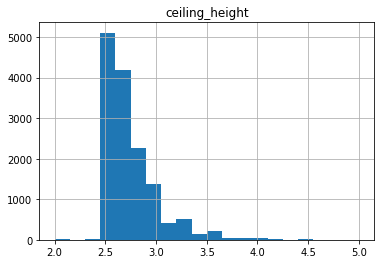

In [308]:
data.hist('ceiling_height', range=(2, 5), bins=20)

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [309]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

180.89706097382657
95.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8cb0d50>]],
      dtype=object)

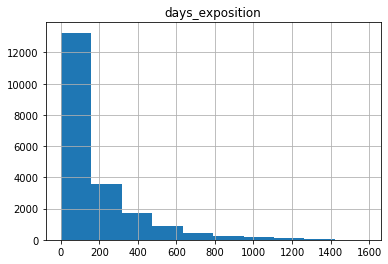

In [310]:
data.hist('days_exposition')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf8eb3790>]],
      dtype=object)

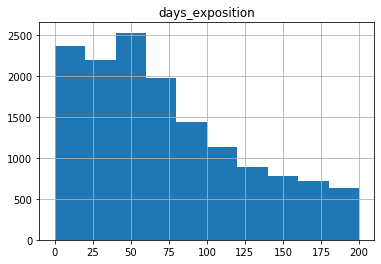

In [311]:
data.hist('days_exposition', range=(0, 200))

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


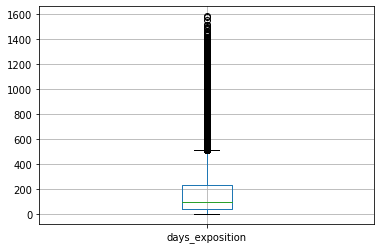

In [312]:
data.boxplot('days_exposition')
print(data['days_exposition'].describe())

В среднем продажа занимает 180 дней (примерно полгода). 
* Мы можем считать, что продажа прошла очень быстро, если она произошла быстрее 45 дней (по 1-ому квантилю). 
* Мы можем считать, что продажа прошла довольно быстро, если она произошла быстрее 95 дней (по медиане). 
* Мы можем считать, что продажа прошла медленно, если она произошла чере 232 дня или дольше (по 3-му квантилю). 

#### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

Задание было выполнено на этапе предподготовки данных:
* <code>ceiling_height</code> - высота потолков варьировалась от 1 до 100 м
* <code>last_price</code> - было обнаружено предложение о продаже за 12К рублей

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

0.6537402377092492


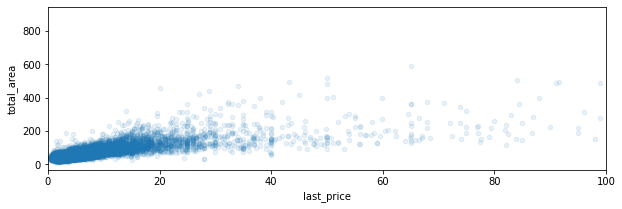

In [313]:
# Зависимость от метража
print(data['last_price'].corr(data['total_area']))
data.plot(kind='scatter', x='last_price', y='total_area', alpha=0.1, xlim=(0, 100), figsize=(10, 3))

In [314]:
# Зависимость от количества комнат
print(data['last_price'].corr(data['rooms']))
print(data.pivot_table(index='rooms', values='last_price'))

0.36661954248561207
       last_price
rooms            
1        3.815320
2        5.592308
3        8.179119
4       13.423497
5       23.762082
6       31.709752
7       51.470069
8       51.822308
9       34.152362
10      26.166667
11      25.250000
12     420.000000
14      26.829500
15      65.000000
16      28.500000
19      32.250000


Бросается в глаза, что начиная с 7-ми комнатных квартир цены перестают стабильно расти. Проверим дополнительно зависимость количества комнат и цены для 7-ми-и-менее-комнатных квартир.

In [315]:
print(data.query('rooms <= 7')['last_price'].corr(data['rooms']))

0.3536527988522051


-0.20677144580089787
-0.2595324949588216


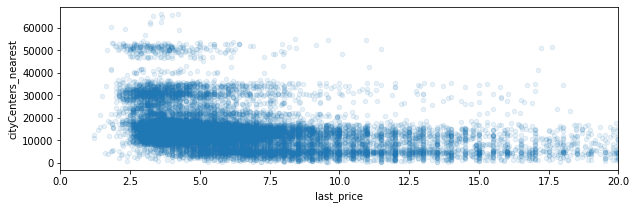

In [316]:
# Зависимость от удаленности от центра
print(data['last_price'].corr(data['cityCenters_nearest']))
print(data.query('locality_name == "Санкт-Петербург"')['last_price'].corr(data['cityCenters_nearest']))
data.plot(kind='scatter', x='last_price', y='cityCenters_nearest', alpha=0.1, xlim=(0, 20), figsize=(10, 3))

In [317]:
# Зависимость от этажа: первый, последний, другой
print(data.pivot_table(index='floor_type', values='last_price'))
print(data.query('rooms <= 3').pivot_table(index='floor_type', values='last_price'))

            last_price
floor_type            
first         4.803560
last          7.363228
other         6.674074
unknown       6.962051
            last_price
floor_type            
first         4.333991
last          5.292150
other         5.877724
unknown       6.349115


In [318]:
# Зависимость от даты размещения
print(data['last_price'].corr(data['weekday']))
print(data['last_price'].corr(data['month']))
print(data['last_price'].corr(data['year']))
print(data.pivot_table(index='year', values='last_price'))

0.001542106720072276
0.00275455909991585
-0.043051858585154604
      last_price
year            
2014   12.087136
2015    8.572833
2016    6.827912
2017    6.585729
2018    5.950966
2019    6.784741


<b>Выводы</b>:
* цена прямо зависит от метража (чем больше метраж, тем больше цена); тем не менее, коэффициент корреляции не прямо 1, т.к., очевидно, что метраж не главное
* цена зависит от числа комнат; бросается в глаза, что начиная с 7-ми комнатных квартир средняя цена перестает стабильно возрастать, однако и для выборки только с 1 по 6 комнатные квартиры - коэффициент корреляции практически не меняется
* удаленность от центра обычно уменьшает цену квартиры; коэф -0.2, но даже для СПБ, с его историческим центром эта зависимость не слишком выделается - всего -0.25
* этаж: если смотреть все предложения, то верхние этаже оказались самыми дорогими. Видимо, это из-за эксклюзивных предложений с пентхаузом. Действительно, если рассмотреть только 1-3-х комнатные квартиры (т.е. по идее это будут "обычные" дома без пентхаузов), то получаем ожидаемое распределение: первый этаж - самый дешевый, "средние" этажи - дорогие, верхний этаж - чуть дешевле "средних" (примерно на 10%)
* зависимость цены от дня недели и месяца размещения - практически отсутствует; интересно, что зависимость от года - близка к 0, но со знаком "минус". Действительно, дополнительная проверка показала, что с 2014 по 2018 год средняя цена стабильно падала, и только в 2019 году начала снова расти.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце <code>locality_name</code>

In [319]:
data_prices_by_locatity = data.query('locality_name != "unknown"').pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])
data_prices_by_locatity.columns = ['ads_number', 'mean_price']
data_prices_by_locatity = data_prices_by_locatity.sort_values(by='ads_number', ascending=False).head(10)
data_prices_by_locatity.sort_values(by='mean_price', ascending=False)

,ads_number,mean_price
locality_name,,
Санкт-Петербург,15720,8.063019
Пушкин,369,6.469036
Парголово,327,4.488075
Кудрово,472,4.358688
Шушары,440,4.108082
Колпино,338,3.964021
Всеволожск,398,3.789068
Мурино,590,3.678462
Гатчина,307,3.488337


Среди 10 населенных пунктов с самым большим количеством объявлений: самая высокая средняя цена квартир в Санкт-Петербурге, самая низкая - в Выборге.

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге <code>locality_name</code>. Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [320]:
data_spb = data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
data_spb['city_center_km'] = round(data_spb['cityCenters_nearest'] / 1000)
data_spb.head(5).loc[:, ['locality_name', 'cityCenters_nearest', 'city_center_km']]

,locality_name,cityCenters_nearest,city_center_km
0,Санкт-Петербург,16028.0,16.0
1,Санкт-Петербург,13933.0,14.0
2,Санкт-Петербург,6800.0,7.0
3,Санкт-Петербург,8098.0,8.0
4,Санкт-Петербург,11634.0,12.0


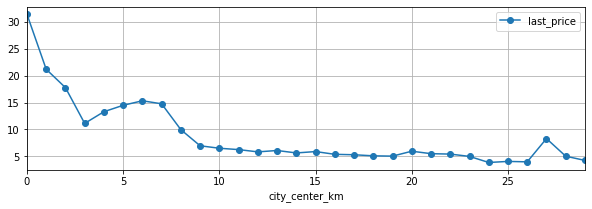

In [321]:
data_spb.pivot_table(index='city_center_km', values='last_price').plot(grid=True, style='o-', figsize=(10,3))

График сильно меняется от 0 до 9 км, а потом похож на линию (за исключением странного всплеска на 27 км). Исходя из этого центральной зоной города можно считать окружность радиусом 9 км.

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [322]:
# Создадим отдельную таблицу для центра СПБ
data_spb_center = data_spb.query('city_center_km <= 9').reset_index(drop=True)

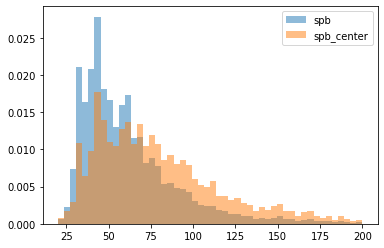

In [323]:
# Сравниваем площадь
plt.hist(data_spb['total_area'], bins=50, range=(20, 200), alpha=0.5, label='spb', density=True)
plt.hist(data_spb_center['total_area'], bins=50, range=(20, 200), alpha=0.5, label='spb_center', density=True)
plt.legend(loc='upper right')
plt.show()

count    15720.000000
mean         8.063019
std         13.013389
min          1.190000
25%          4.200000
50%          5.500000
75%          8.162500
max        763.000000
Name: last_price, dtype: float64
count    4714.000000
mean       13.273913
std        22.245978
min         1.600000
25%         5.956327
50%         8.500000
75%        13.087500
max       763.000000
Name: last_price, dtype: float64


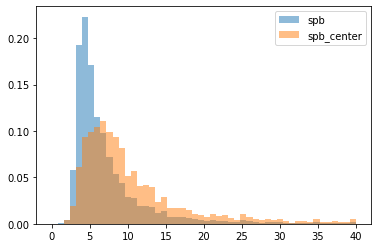

In [324]:
# Сравниваем цены
print(data_spb['last_price'].describe())
print(data_spb_center['last_price'].describe())
plt.hist(data_spb['last_price'], bins=50, range=(0, 40), alpha=0.5, label='spb', density=True)
plt.hist(data_spb_center['last_price'], bins=50, range=(0, 40), alpha=0.5, label='spb_center', density=True)
plt.legend(loc='upper right')
plt.show()

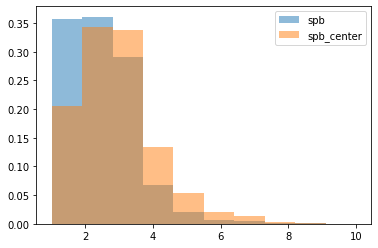

In [325]:
# Сравниваем число комнат
plt.hist(data_spb['rooms'], bins=10, range=(1, 10), alpha=0.5, label='spb', density=True)
plt.hist(data_spb_center['rooms'], bins=10, range=(1, 10), alpha=0.5, label='spb_center', density=True)
plt.legend(loc='upper right')
plt.show()

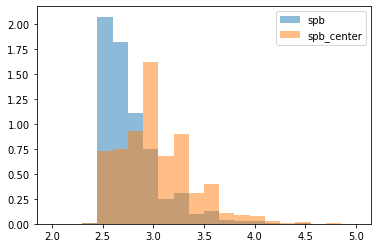

In [330]:
# Сравниваем высоту потолков
plt.hist(data_spb['ceiling_height'], bins=20, range=(2, 5), alpha=0.5, label='spb', density=True)
plt.hist(data_spb_center['ceiling_height'], bins=20, range=(2, 5), alpha=0.5, label='spb_center', density=True)
plt.legend(loc='upper right')
plt.show()

<b>Выводы</b>: 
* <b>площадь</b> квартир в центре имеет более пологий график, это значит, что вариантов квартир в центре с меньшими площадями меньше, а с большими - больше (по сравнению с СПБ в целом). Тем не менее в обоих случаях заметен пик в предложениях - и там и там больше всего объявлений c метражом около 40 м2.
* <b>цены</b>: квартиры в центре дороже, в среднем на 40%!
* <b>число комнат</b>: 
    * в центре примерно поровну объявлений о продаже 2-х и 3-х комнатных квартир, а вот однушек продается меньше по сравнению с СПБ в целом; 
    * в целом в центре больше предложений о продаже многокомнатных квартир;
    * в СПБ в целом примерно поровну объявлений о продаже 1 и 2-х комнатных квартир, далее с ростом числа комнат предложений становится меньше.
* в центре СПБ <b>высота потолков</b> выше: самое частое предложение - 3м; в СПБ в целом потолки пониже - чаще всего продаются квартиры с "типовыми" 2,5-метровыми потолками.

Далее найдем факторы, которые влияют на стоимость квартиры в центре СПБ. Проверим показатели: число комнат, этаж, удалённость от центра, дата размещения объявления.

0.3543423013242578
AxesSubplot(0.125,0.125;0.775x0.755)


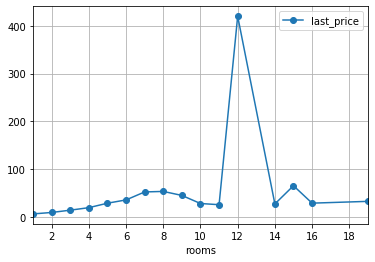

In [327]:
# Зависимость от числа комнат
print(data_spb_center['last_price'].corr(data_spb_center['rooms']))
print(data_spb_center.pivot_table(index='rooms', values='last_price').plot(style='o-', grid=True))

График доставляет! Понятно, что начиная с 10-12 комнатных квартир, все становится крайне эксклюзивным и дорогим. Но этот выброс за 400 млн рублей требует отдельной проверки (в смысле посмотреть на конкретное объявление).

В целом тенденция такова: с ростом количества комнат цена повышается (но все это действует только с 1 до 8-ми комнатных квартир), далее цена немного понижается, а потом мы входим в "зону повышенной турбулентности".

In [337]:
# Зависимость от этажа: первый, последний, другой
print(data_spb_center.pivot_table(index='floor_type', values='last_price'))
print(data_spb_center.query('rooms <= 7').pivot_table(index='rooms', columns='floor_type', values='last_price'))

            last_price
floor_type            
first         8.551217
last         16.962711
other        13.102035
unknown      14.652514
floor_type      first       last      other    unknown
rooms                                                 
1            5.001929   5.605574   6.165745   5.300000
2            6.606522   9.020607   9.389211   8.044174
3           10.475934  12.562071  14.510541  16.133929
4           13.062730  20.257740  19.242373  40.348248
5           14.460114  41.325947  26.581211  11.990000
6           16.255167  51.091095  31.596985        NaN
7           28.422500  90.116875  36.827353        NaN


Картина в целом повторяет исследование по всему датасету в целом: крайние этажи дешевле (первый значительно дешевле последнего), средние этажи дороже. Но начиная с 4-х комнатных квартир цена верхнего этажа становится выше всех остальных, причем значительно: для 4-х комнатных - верхний этаж дороже на 5%, а для 5-ти уже на 37% и т.д.

AxesSubplot(0.125,0.125;0.775x0.755)


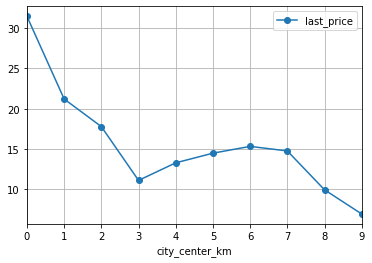

In [334]:
# Зависимость от удаленности от центра
print(data_spb_center.pivot_table(index='city_center_km', values='last_price').plot(style='o-', grid=True))

Этот график мы видели ранее. Здесь интересна отметка - 3 км. Почему в ней точка минимума - непонятно, требует отдельного исследования.

In [333]:
# Зависимость от даты размещения
print(data_spb_center['last_price'].corr(data_spb_center['weekday']))
print(data_spb_center['last_price'].corr(data_spb_center['month']))
print(data_spb_center['last_price'].corr(data_spb_center['year']))
print(data_spb_center.pivot_table(index='year', values='last_price'))

0.019424198522019438
0.002141558746373868
-0.05224498406055039
      last_price
year            
2014   21.746155
2015   15.802097
2016   14.160518
2017   13.763668
2018   11.453025
2019   13.307677


Как и ранее зависимость цены от дня недели и месяца размещения - практически отсутствует. Так же как и во всем датасете с 2014 по 2018 год средняя цена стабильно падала, и только в 2019 году начала снова расти. Центр Санкт-Петербурга также как и окраины Ленинградской области подчиняется той же невидимой руке рынка.

### Шаг 5. Общий вывод

Были изучены данные сервиса Яндекс.Недвижимость.

Выгрузка была проверена, аномальные значения исправлены или удалены.

Затем был проведен анализ зависимости цены от ряда факторов (метража, количества комнат, удаленности от центра, этажа и даты размещения). Анализ был проведен для всего датасета и для данных по центру Санкт-Петербурга отдельно. Полученные выводы:
* цена главным образом зависит от метража
* зависимость от количества комнат проявляется только до 7-комнатных квартир, далее начиная с 8-комнатных квартир цена немного опускается, а затем может резко колебаться в зависимости от конкретных эксклюзивных предложений
* удаленность от центра влияет на цену квартиры (чем ближе к центру тем дороже), однако зависимость не сильно выражена (как, например, для того же метража). При анализе квартир в СПБ выявлено 2 аномалии - просадка для квартир в 3 км от центра, и резкий скачок цен для предложений в 26 км от центра. Эти аномалии требуют отдельного исследования.
* самые низкие цены на квартиры на 1-ом этаже, а вот цена квартиры на верхних этажах сильно зависит от количества комнат - чем больше комнат, тем дороже вариант
* день недели и месяц размещения никак не влияют на цену или скорость продажи

Также было выполнено сравнение предложений по СПБ в целом и центру города.
* в центре больше средний метраж квартиры, поэтому в центре менее представлены однокомнатные квартиры
* высота потолков в центре выше (исторические здания)